# KNN - TP

#### On dispose du dataset portant sur des entreprises présentant des risques de fraude. Le dataset  est donné par trial.csv au niveau du partage. La cible est la colonne Risk.

## <font color=blue>  1. Objectives :</font> 

On s’intéresse à développer un modèle de prédiction de classes. Identifier d’abord les classes disponibles dans le dataset que vous avez reçu

## <font color=blue>  2. Data explortion :</font>

### Import Libraries

In [ ]:
import numpy as np
import pandas pd
import matplotlib.pyplot as plt
import seaborn as sns

### Upload the data

In [174]:
df = pd.read_csv('trial.csv')

### Determination of the number of individuals and variables

In [175]:
dimention = df.shape
nb_rows = df.shape[0]
nb_cols = df.shape[1]

print('The dataset total dimention :',dimention)

print('The dataset contains',nb_rows,'rows')
print('The dataset contains',nb_cols,'columns')

The dataset total dimention : (776, 18)
The dataset contains 776 rows
The dataset contains 18 columns


### Data representation

In [176]:
df.head(6)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.83,2,0.83,5.0,2,2.95,2,2,0,2,0,2,2.0,0


### Columns names

In [177]:
print(df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


### Types of variables

In [178]:
df.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

### Data info

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

#### The dataset does not contan missing values. The variable Bare_Nuclei is an object because it might contain special characters

In [180]:
df.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


## <font color=blue>  3. Preproccessing :</font>

### Finding special character in the dataset

In [158]:
mask = df.Bare_Nuclei == ''

print(df.loc[mask])

     id_number  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
23     1057013                8                     4                      5   
40     1096800                6                     6                      6   
139    1183246                1                     1                      1   
145    1184840                1                     1                      3   
158    1193683                1                     1                      2   
164    1197510                5                     1                      1   
235    1241232                3                     1                      4   
249     169356                3                     1                      1   
275     432809                3                     1                      3   
292     563649                8                     8                      8   
294     606140                1                     1                      1   
297      61634                5         

In [132]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['Bare_Nuclei'] = df['Bare_Nuclei'].str.replace(char, "")

In [173]:
# converting dtype to string 
df["Bare_Nuclei"]= df["Bare_Nuclei"].astype(str) 
# removing '.' 
df["Bare_Nuclei"]= df["Bare_Nuclei"].str.replace("?"," ") 


,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


### Checking NaN

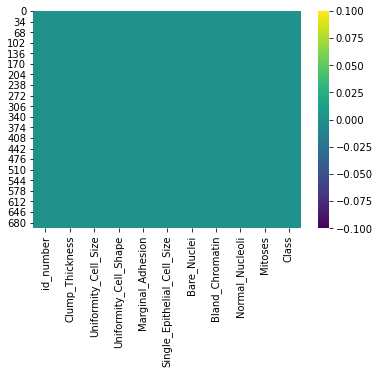

In [167]:
sns.heatmap(df.isnull(), cmap='viridis')

### Checking empty information in varaibles

In [168]:
mask1 = df.id_number.isin([1057013,1096800,1057067])
print(df.loc[mask1])

     id_number  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
23     1057013                8                     4                      5   
40     1096800                6                     6                      6   
617    1057067                1                     1                      1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
23                   1                            2               
40                   9                            6               
617                  1                            1               

     Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
23                 7                3        1      4  
40                 7                8        1      2  
617                1                1        1      2  


In [ ]:
#### The replacement made in the previous step created NaN

### Data cleaning 

In [169]:
# we need to transform the type of the variable Bare_Nuclei to numeric

# convert column "a" of a DataFrame
#df = pd.to_numeric(df,downcast='integer')

#df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int64)

#df['Bare_Nuclei'].astype('int')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Checking missing values

In [137]:
display(df[df.isna().any(axis=1)].style.highlight_null('yellow'))

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [112]:
NaN_Rows_Ids = df[df.isna().any(axis=1)].index

### Replace missing values

In [113]:
df1 = df.copy()
df1ImputeMediane = df1.fillna(df.median())

In [114]:
display(df1.iloc[NaN_Rows_Ids,:].style.highlight_null('yellow'))
display(df1ImputeMediane.iloc[NaN_Rows_Ids,:].style.highlight_null('yellow'))

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,nan,7,3,1,4
40,1096800,6,6,6,9,6,nan,7,8,1,2
139,1183246,1,1,1,1,1,nan,2,1,1,2
145,1184840,1,1,3,1,2,nan,2,1,1,2
158,1193683,1,1,2,1,3,nan,1,1,1,2
164,1197510,5,1,1,1,2,nan,3,1,1,2
235,1241232,3,1,4,1,2,nan,3,1,1,2
249,169356,3,1,1,1,2,nan,3,1,1,2
275,432809,3,1,3,1,2,nan,2,1,1,2
292,563649,8,8,8,1,2,nan,6,10,1,4


,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,1.000000,7,3,1,4
40,1096800,6,6,6,9,6,1.000000,7,8,1,2
139,1183246,1,1,1,1,1,1.000000,2,1,1,2
145,1184840,1,1,3,1,2,1.000000,2,1,1,2
158,1193683,1,1,2,1,3,1.000000,1,1,1,2
164,1197510,5,1,1,1,2,1.000000,3,1,1,2
235,1241232,3,1,4,1,2,1.000000,3,1,1,2
249,169356,3,1,1,1,2,1.000000,3,1,1,2
275,432809,3,1,3,1,2,1.000000,2,1,1,2
292,563649,8,8,8,1,2,1.000000,6,10,1,4


## 3.	Développer la matrice de correlation. Interpréter vos résultats.

### Looking for Correlations

In [116]:
corr_matrix = df1.corr().round(1)


In [117]:
corr_matrix["Class"].sort_values(ascending=False)

Class                          1.0
Bland_Chromatin                0.8
Bare_Nuclei                    0.8
Uniformity_Cell_Shape          0.8
Uniformity_Cell_Size           0.8
Normal_Nucleoli                0.7
Single_Epithelial_Cell_Size    0.7
Marginal_Adhesion              0.7
Clump_Thickness                0.7
Mitoses                        0.4
id_number                     -0.1
Name: Class, dtype: float64

Como se puede observar en los resultsados antes expuesto, todas las variables tienen alta correlacion con la variable Class (variable to be predecided), excepto las variables Mitoses y el id_number.

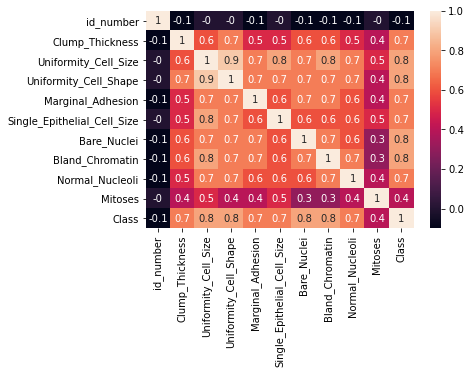

In [118]:
sns.heatmap(data = corr_matrix, annot = True)

## 4.	Procéder à la séparation train/test (80-20) de votre dataset original (seed 44)

### Prepare the Data for Machine Learning Algorithms

In [119]:
train = df1.drop("Class", axis=1)
test = df["Class"].copy()

### Select and Train a Model

In [120]:
from sklearn.model_selection import train_test_split
# Break down predictive data into training / testing

X_train, X_test, y_train, y_test = \
train_test_split(train, test, test_size = 0.20, random_state = 44)

In [121]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(559, 10) (140, 10) (559,) (140,)


## 5.	Développer le modèle en laissant la valeur par défaut de K.

## KNN model development

In [122]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

neigh.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').